In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sub_image = "C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project-main\\Codes\\normal codes\\sub_images\\RUH_2018-12-15_0_14.npy"
# Load the sub-image as a NumPy array
sub_image = np.load(sub_image)

plt.imshow(sub_image,cmap='RdYlGn')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project-main\\Codes\\normal codes\\sub_images\\RUH_2018-12-15_0_14.npy'

In [ ]:
cluster_counts = [0, 0, 0, 0, 0, 0]

# Loop over each pixel in the NDVI array
for row in range(sub_image.shape[0]):  
    for col in range(sub_image.shape[1]): 
        value = sub_image[row, col]
        if value > 0.5:
            cluster_counts[0] += 1
        elif value > 0.4:
            cluster_counts[1] += 1
        elif value >0.3:
            cluster_counts[2] += 1
        elif value >0.2:
            cluster_counts[3] += 1

        elif value > 0:
            cluster_counts[4] += 1
        else:
            cluster_counts[5] += 1


cluster_labels = ['> 0.5', '> 0.4', '> 0.3', '> 0.2', '> 0', '≤ 0']

plt.figure(figsize=(10, 6))
plt.bar(cluster_labels, cluster_counts, color='skyblue')
plt.title('NDVI Value Distribution')
plt.xlabel('NDVI Value Range')
plt.ylabel('Pixel Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print(cluster_counts)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:


# Function to determine the optimal number of clusters using the Elbow Method
def find_optimal_k(sub_image):
    k_values = range(1, 11)
    sse = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=0).fit(sub_image)
        sse.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, sse, '-o')
    plt.title('Elbow Method to Determine Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()



find_optimal_k(sub_image)

In [ ]:


# Find the optimal number of clusters
find_optimal_k(sub_image)

# After visually determining the optimal k from the Elbow plot,
# replace 'optimal_k' with that value and uncomment the next line


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

def cluster_image(sub_image, optimal_k):
    if sub_image.ndim == 3:
        # For 3D arrays: Reshape assuming the third dimension is color channels
        original_shape = sub_image.shape[:2]  # Get the original height and width
        pixels = sub_image.reshape(-1, sub_image.shape[2])  # Reshape to a 2D array for K-Means
    elif sub_image.ndim == 2:
        # For 2D arrays: Use directly for K-Means
        original_shape = sub_image.shape
        pixels = sub_image.flatten().reshape(-1, 1)  # Reshape to 2D array with one feature
    else:
        raise ValueError("Unsupported image dimensionality. Image must be 2D or 3D.")

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(pixels)
    
    # Reshape the labels back to the original image shape
    clustered_img = kmeans.labels_.reshape(original_shape)
    
    # Plotting
    plt.figure(figsize=(10, 10))
    plt.imshow(clustered_img, cmap='RdYlGn')
    plt.title(f'Image clustered into {optimal_k} colors')
    plt.axis('off')  # Hide axes ticks
    plt.show()

# Make sure to replace 'sub_image' with your actual image array
cluster_image(sub_image, optimal_k=4)


In [ ]:

def cluster_image_with_colors(sub_image, optimal_k, cluster_colors):
    # Ensure the image array is in the correct shape for K-Means
    pixels = sub_image.reshape(-1, 1)  # Reshape the 256x256 image into a 65536x1 array

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(pixels)
    
    # Initialize an array for the new image with the shape 256x256x3 for RGB colors
    new_img = np.zeros((sub_image.shape[0], sub_image.shape[1], 3))

    # Assign the specified color to each cluster
    for i in range(optimal_k):
        new_img[kmeans.labels_.reshape(sub_image.shape) == i] = cluster_colors[i]

    # Plotting
    plt.figure(figsize=(10, 10))
    plt.imshow(new_img)
    plt.title(f'Image clustered into {optimal_k} colors')
    plt.axis('off')  # Hide the axes
    plt.show()

# Define colors for each cluster (as RGB tuples)
cluster_colors = [
    (0, 0, 0),  # Red for cluster 0
    (0, 1, 0),  # Green for cluster 1
    (0, 0, 1),  # Blue for cluster 2
    (1, 1, 0)   # Yellow for cluster 3
]

# Example usage with a dummy 256x256 numpy array
# Replace 'dummy_image' with your actual 256x256 numpy array
#sub_image = np.random.rand(256, 256)  # Example dummy data; replace with your actual data
cluster_image_with_colors(sub_image, optimal_k=4, cluster_colors=cluster_colors)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to cluster the image and return the KMeans object and reshaped labels
def cluster_image(sub_image, optimal_k):
    pixels = sub_image.reshape(-1, 1)  # Reshape the 256x256 image for K-Means
    kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(pixels)
    return kmeans, kmeans.labels_.reshape(sub_image.shape)

# Function to plot the distribution of pixel intensities in each cluster
def plot_cluster_intensity_distributions(kmeans_labels, img_array, optimal_k):
    plt.figure(figsize=(15, 5))
    for i in range(optimal_k):
        cluster_pixels = img_array[kmeans_labels == i]
        plt.subplot(1, optimal_k, i+1)
        plt.hist(cluster_pixels, bins=30, color='gray')
        plt.title(f'Cluster {i} Intensity Distribution')
        plt.xlabel('Intensity')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Function to visualize the spatial distribution of clusters
def visualize_clusters_spatially(kmeans_labels, optimal_k):
    fig, axes = plt.subplots(1, optimal_k, figsize=(15, 5))
    for i in range(optimal_k):
        cluster_img = np.zeros(kmeans_labels.shape)
        cluster_img[kmeans_labels == i] = 1  # Set pixels in the cluster to 1
        axes[i].imshow(cluster_img, cmap='gray')
        axes[i].set_title(f'Cluster {i}')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()



# Clustering the image
optimal_k = 2  # Set the number of clusters
kmeans, kmeans_labels = cluster_image(sub_image, optimal_k)

# Analyzing the clusters
plot_cluster_intensity_distributions(kmeans_labels, sub_image, optimal_k)
visualize_clusters_spatially(kmeans_labels, optimal_k)


In [ ]:
from osgeo import gdal

In [ ]:
image_path="C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project-main\\NDVI-Data\\NDVI_RUH-B4-B8_2018-12-15.tif"
'''data=gdal.Open(image_path)
NDVI = data.GetRasterBand(1)
sub_image = NDVI.ReadAsArray()

ndvi_image = np.nan_to_num(sub_image, nan=0.01)'''

In [ ]:
data=gdal.Open(image_path)

c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\osgeo\gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [ ]:
NDVI = data.GetRasterBand(1)
sub_image = NDVI.ReadAsArray()

ndvi_image = np.nan_to_num(sub_image, nan=0.01)

c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


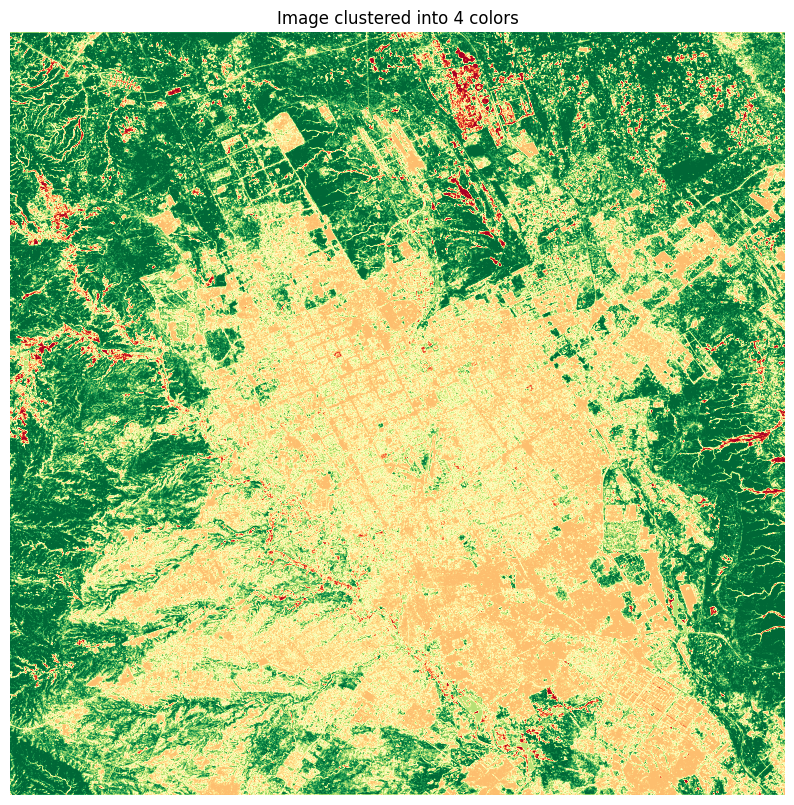

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

def cluster_image(ndvi_image, optimal_k):
    if ndvi_image.ndim == 3:
        # For 3D arrays: Reshape assuming the third dimension is color channels
        original_shape = ndvi_image.shape[:2]  # Get the original height and width
        pixels = ndvi_image.reshape(-1, ndvi_image.shape[2])  # Reshape to a 2D array for K-Means
    elif ndvi_image.ndim == 2:
        # For 2D arrays: Use directly for K-Means
        original_shape = ndvi_image.shape
        pixels = ndvi_image.flatten().reshape(-1, 1)  # Reshape to 2D array with one feature
    else:
        raise ValueError("Unsupported image dimensionality. Image must be 2D or 3D.")

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(pixels)
    
    # Reshape the labels back to the original image shape
    clustered_img = kmeans.labels_.reshape(original_shape)
    
    # Plotting
    plt.figure(figsize=(10, 10))
    plt.imshow(clustered_img, cmap='RdYlGn')
    plt.title(f'Image clustered into {optimal_k} colors')
    plt.axis('off')  # Hide axes ticks
    plt.show()

# Make sure to replace 'sub_image' with your actual image array
cluster_image(ndvi_image, optimal_k=4)


c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


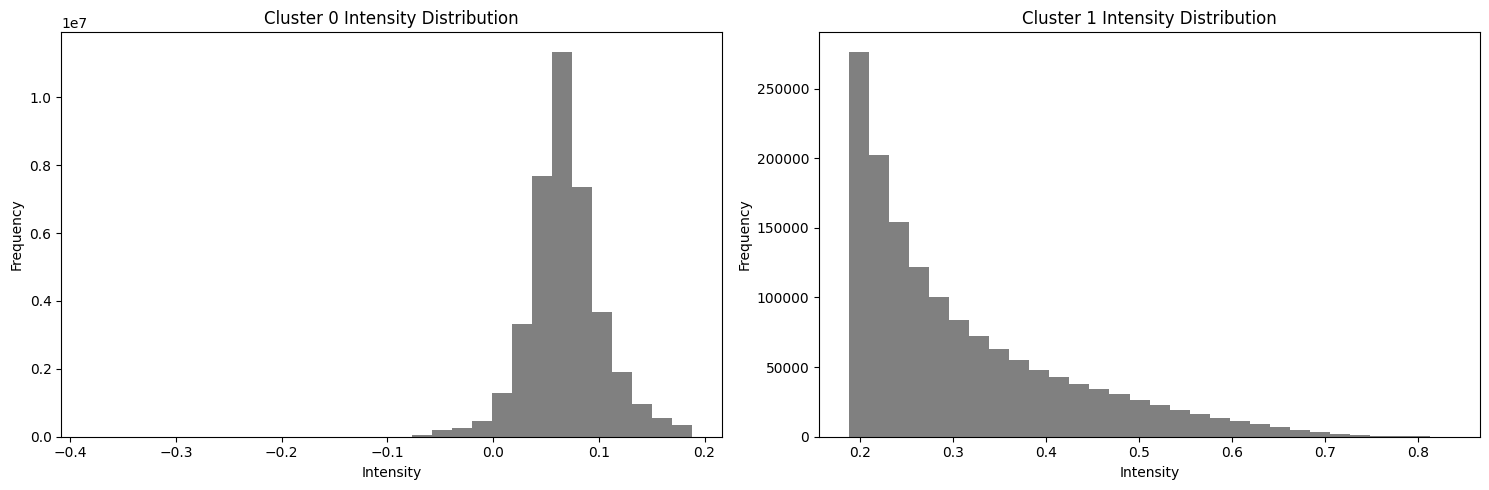

[0.22277959 0.20573871 0.20573871 ... 0.23009476 0.23009476 0.2016851 ]


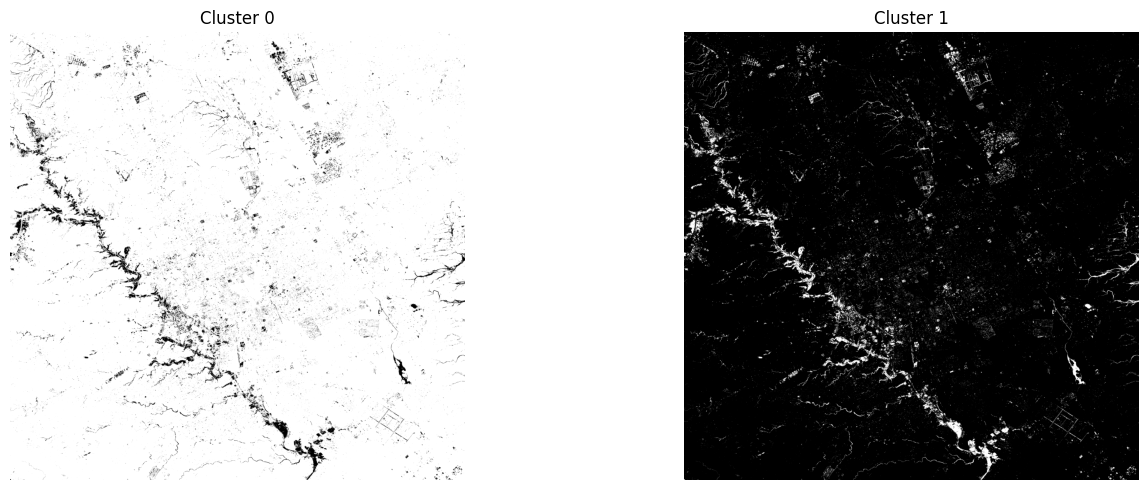

In [ ]:


# Function to cluster the image and return the KMeans object and reshaped labels
def cluster_image(ndvi_image, optimal_k):
    pixels = ndvi_image.reshape(-1, 1)  # Reshape the 256x256 image for K-Means
    kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(pixels)
    return kmeans, kmeans.labels_.reshape(ndvi_image.shape)

# Function to plot the distribution of pixel intensities in each cluster
def plot_cluster_intensity_distributions(kmeans_labels, img_array, optimal_k):
    plt.figure(figsize=(15, 5))
    for i in range(optimal_k):
        cluster_pixels = img_array[kmeans_labels == i]
        plt.subplot(1, optimal_k, i+1)
        plt.hist(cluster_pixels, bins=30, color='gray')
        plt.title(f'Cluster {i} Intensity Distribution')
        plt.xlabel('Intensity')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    

# Function to visualize the spatial distribution of clusters
def visualize_clusters_spatially(kmeans_labels, optimal_k):
    fig, axes = plt.subplots(1, optimal_k, figsize=(15, 5))
    for i in range(optimal_k):
        cluster_img = np.zeros(kmeans_labels.shape)
        cluster_img[kmeans_labels == i] = 1  # Set pixels in the cluster to 1
        axes[i].imshow(cluster_img, cmap='gray')
        axes[i].set_title(f'Cluster {i}')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()



# Clustering the image
optimal_k = 2  # Set the number of clusters
kmeans, kmeans_labels = cluster_image(ndvi_image, optimal_k)

# Analyzing the clusters
plot_cluster_intensity_distributions(kmeans_labels, ndvi_image, optimal_k)
visualize_clusters_spatially(kmeans_labels, optimal_k)


In [ ]:
def calculate_cluster_percentages(kmeans_labels):
    total_pixels = kmeans_labels.size  # Total number of pixels in the image
    unique, counts = np.unique(kmeans_labels, return_counts=True)
    percentages = {k: count / total_pixels * 100 for k, count in zip(unique, counts)}
    return percentages

# Calculate and print cluster percentages
percentages = calculate_cluster_percentages(kmeans_labels)
for cluster, percentage in percentages.items():
    print(f"Cluster {cluster}: {percentage:.2f}%")


Cluster 0: 96.43%
Cluster 1: 3.57%
